In [1]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from scipy.stats import t

### Loading and residuals

1. Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their rank, weight (wt - in pounds) and height (ht - in inches). 

2. Fit a linear model of weight (`wt`) explained by height (`ht`) using a linear regression model from sklearn, as done in the lab tutorial (Week 6).  Call your fitted model `model`.  

3. Make a scatter plot of the height (x-axis) against weight (y-axis). Add the predicted values for 66-80 inches. 

4. Calculate the residuals from the fit, and report the r-squared for this model.

Training rsquared is  0.43807746842392203


Text(0.5, 1.0, 'Weight vs. Height')

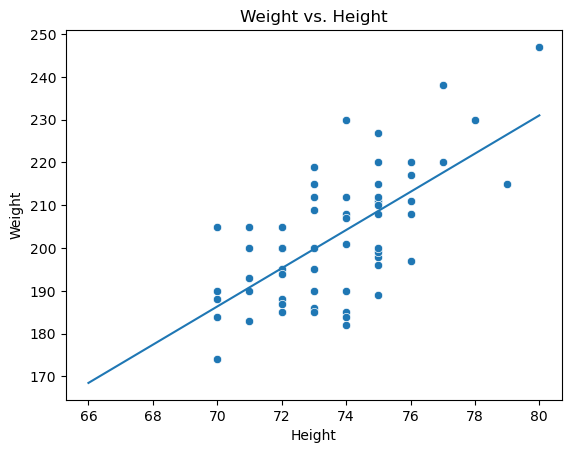

In [2]:
df=pd.read_csv('hockey_draftees_2005.csv')

# Make it and fit the model 
model = sklearn.linear_model.LinearRegression()
model.fit(np.c_[df.ht],df.wt)

# Make the scatter plot 
ax=sns.scatterplot(x=df.ht,y=df.wt)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

#Generate and plot the predicted values
xp = np.linspace(66, 80, 30)
yp = model.predict(np.c_[xp])
plt.plot(xp,yp)

# Calculate 
res = df.wt-model.predict(np.c_[df.ht])
RSS = np.sum(res**2)
TSS = np.sum((df.wt-df.wt.mean())**2)
R2 = 1 - RSS/TSS 
print('Training rsquared is ',R2)
plt.title("Weight vs. Height")

In [3]:
model.coef_

array([4.46509731])

### Bootstrap confidence intervals on parameters

How confident can we be about the relation between height and weight? 
To judge this we need confidence intervals let's use the bootstrap.

1. Modify the function `BootstrapCoef` from lab tutorial (Week 6) - part 2 to conduct a boostrap analysis for this regression model; 

 * `data`, which is a dataframe having columns 'weight' and 'height'
 * `numboot` which is an integer denoting how many bootstrap replications to perform.

2. Write `bootstrap` to perform bootstrap resampling. You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  `bootstrap` should return:
  params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept value and the slope from the linear regression. 

  *Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_. 

Here is the documentation for `pd.DataFrame.sample`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

3. Then call the function to get 100 boostrap samples for your linear regression model of wt explained by height. 
4. Make a joint scatter plot of the parameter value for the intercept and for the slope. 

In [4]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data,numboot=1000):
    regr = sklearn.linear_model.LinearRegression()
#     numboot = 1000
    n = len(data)
    theta = np.zeros((numboot,2))    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.ht]
        regr.fit(X_fit,d.wt)
        theta[i,0]=regr.intercept_
        theta[i,1]=regr.coef_
    return theta

params = BootstrapCoef(df,100)

Text(0.5, 0.98, 'Joint distribution of slope and intercept')

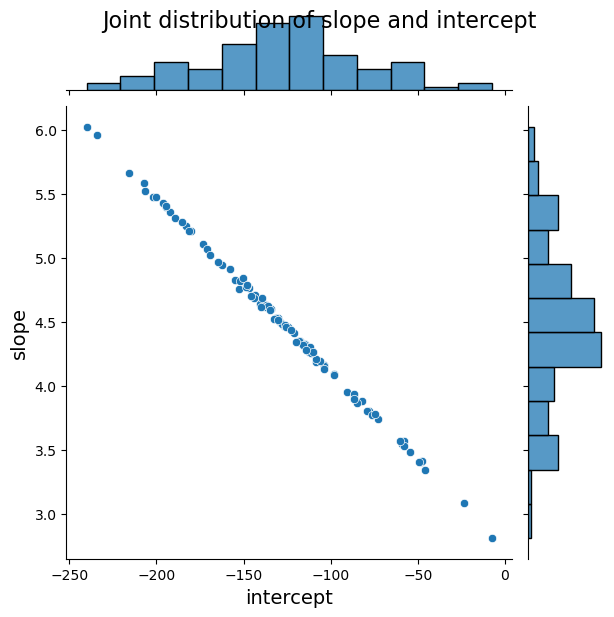

In [5]:
ax = sns.jointplot(x=params[:,0],y=params[:,1])
ax.set_axis_labels(xlabel="intercept", ylabel="slope", fontsize = 14)
ax.fig.suptitle("Joint distribution of slope and intercept", fontsize = 16)

Intercept and slope regressors are highly colinear - as we did not subtract the mean of ht before thre regression. 

### Bootstrap-confidence interval

1. Plot the bootstrap estimates for the slope as a histogram.  

2. Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the slope. 
 

My confidence interval is between 3.3750554525163476 and 5.629977034642505


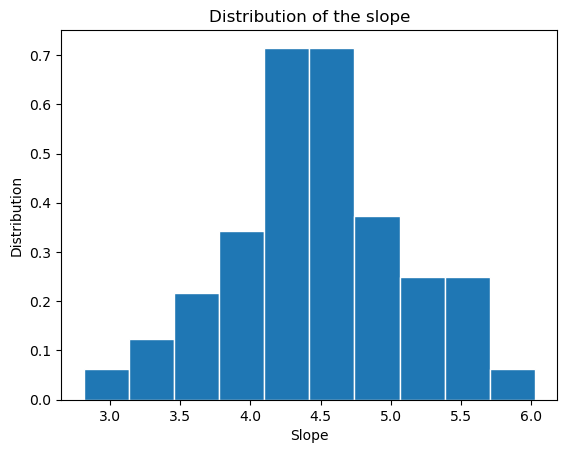

In [6]:
plt.hist(params[:,1], edgecolor = 'white', density=True)
plt.xlabel("Slope")
plt.ylabel("Distribution")
plt.title("Distribution of the slope")
ci_lower, ci_upper = np.quantile(params[:,1], [0.025, 0.975])


print(f'My confidence interval is between {ci_lower} and {ci_upper}')

**Written answer**: The interval contains the true slope parameter with a probability of 95%. 

### More Boostrap

Text(0, 0.5, 'Weight')

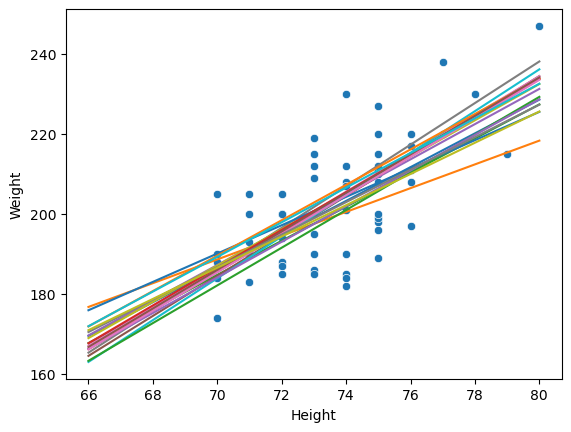

In [7]:
# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data,xp):
    regr = sklearn.linear_model.LinearRegression()
    numboot = 20
    n = len(data)
    X_pred = np.c_[xp]
    y_pred = np.zeros((numboot,X_pred.shape[0]))    

    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.ht]
        regr.fit(X_fit,d.wt)
        y_pred[i,:]=regr.predict(X_pred)
    return y_pred

# Get predictions from 20 bootstrapped models 
xp = np.linspace(66, 80, 30)
YP = BootstrapPred(df,xp)

# Make a scatterplot and draw the 20 lines  
ax=sns.scatterplot(x=df.ht,y=df.wt)
for i in range(20):
    plt.plot(xp,YP[i,:])

ax.set_xlabel('Height')
ax.set_ylabel('Weight')


The greatest uncertainty we have for the very small and very tall players. All lines agree in their prediction for the players of middle weight. For the lines to cross in the middle of the graph, a large slope needs to have a small intercept and a small slope needs to have a large intercept. 

### Out-of-sample

Now, let's see how well our model performs on out-of-sample (a separate test set).  

1. Load in the `hockey_draftees_test.csv` file into a dataframe.  

2. Use your fitted `model` to make predictions. 

3. Make a scatter plot of the test data and superimpose the prediction of the model. 

4. To evaluate this prediction, calculate the r-square value for the out of sample (oos) data.  Statsmodels doesn't provide a function to compute r-squared on new data.  You will have to write one yourself or find one that performs the computation for you.

Out of sample rsquared is  -1156.1937216484064


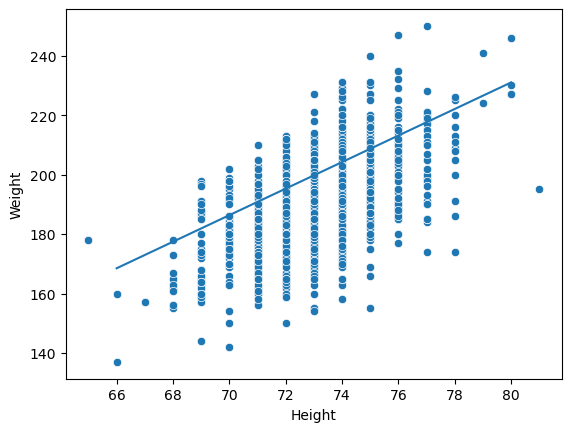

In [8]:
df_test=pd.read_csv('hockey_draftees_test.csv')

# Make the scatter plot 
ax=sns.scatterplot(x=df_test.ht,y=df_test.wt)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

#Generate and plot the predicted values
xp = np.linspace(66, 80, 30)
yp = model.predict(np.c_[xp])
plt.plot(xp,yp)


# Now do the prediction for the test data and compute R2
y = df_test.wt.values
yhat = model.predict(np.c_[df_test.wt])
rsquared_oos = 1 - (np.sum((y - yhat)**2)) / np.sum((y - y.mean())**2)
print('Out of sample rsquared is ', rsquared_oos)
